# Part VII: Exploring more carefully the correlation coefficients

With the summaries produced in the previous steps, we explore which combination of bandwidth and scale yield the most meaningful topological results in terms of biological interpretability. This is done for every gene.

Final results are ploted and visualized for eye test.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
import os

from importlib import reload
import utils
from scipy import stats

In [2]:
level = 'sub'
ndims = 3
fs = 12
dpi = 96
KBINS_NO = 27

Cmap='plasma'
s = 30
sample = 'D2'
smcolumns = ['PCA 1','PCA 2','N','Density','Centrality']
crcolumns=['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'intercept_stderr', 'spearson', 'ppearson', 'sspearman', 'pspearman']
rtkw = dict(ha='right', va='bottom', c='navy', bbox=dict(facecolor='cornsilk', alpha=0.75, boxstyle=mpl.patches.BoxStyle("Square", pad=0.05)))

wsrc = os.pardir + os.sep + 'cell_dams' + os.sep
nsrc = os.pardir + os.sep + 'nuclear_mask' + os.sep
ksrc = os.pardir + os.sep + 'kde' + os.sep + sample + os.sep
psrc = os.pardir + os.sep + 'geometry' + os.sep + sample + os.sep
isrc = os.pardir + os.sep + 'infected_focus_summer24' + os.sep + sample + os.sep
gsrc = os.pardir + os.sep + level + 'level' + os.sep + sample + os.sep

metacell = pd.read_csv(ksrc + sample + '_cells_metadata.csv', index_col='ndimage_cellID')
cell_nuc = pd.read_csv(ksrc + sample + '_nuclei_limits.csv')
cell_nuc['perc_inside'] = 1/cell_nuc['perc_inside']

k = 0
vs = ['' for _ in range( len(smcolumns)*( len(smcolumns) - 1)//2) ]
for i in range(len(smcolumns)-1):
    for j in range(i+1, len(smcolumns)):
        vs[k] = '{}-vs-{}'.format(smcolumns[i] , smcolumns[j] )
        k += 1
print(vs)

['PCA 1-vs-PCA 2', 'PCA 1-vs-N', 'PCA 1-vs-Density', 'PCA 1-vs-Centrality', 'PCA 2-vs-N', 'PCA 2-vs-Density', 'PCA 2-vs-Centrality', 'N-vs-Density', 'N-vs-Centrality', 'Density-vs-Centrality']


In [4]:
corrfiles = sorted( glob(isrc + '*'+level+'level/PI_scale*_corr_summary.csv') )
corrs = [None for _ in range(len(corrfiles))]
for i in range(len(corrs)):
    corrs[i] = pd.read_csv(corrfiles[i], index_col='Comparison')

print(corrs[0].shape)
print(corrs[0].index)
print(corrs[0].columns)

(36, 10)
Index(['PC 1-vs-PC 2', 'PC 1-vs-N', 'PC 1-vs-Density', 'PC 1-vs-N(05G203100)',
       'PC 1-vs-X', 'PC 1-vs-Y', 'PC 1-vs-Cell Size', 'PC 1-vs-Eccentricity',
       'PC 2-vs-N', 'PC 2-vs-Density', 'PC 2-vs-N(05G203100)', 'PC 2-vs-X',
       'PC 2-vs-Y', 'PC 2-vs-Cell Size', 'PC 2-vs-Eccentricity',
       'N-vs-Density', 'N-vs-N(05G203100)', 'N-vs-X', 'N-vs-Y',
       'N-vs-Cell Size', 'N-vs-Eccentricity', 'Density-vs-N(05G203100)',
       'Density-vs-X', 'Density-vs-Y', 'Density-vs-Cell Size',
       'Density-vs-Eccentricity', 'N(05G203100)-vs-X', 'N(05G203100)-vs-Y',
       'N(05G203100)-vs-Cell Size', 'N(05G203100)-vs-Eccentricity', 'X-vs-Y',
       'X-vs-Cell Size', 'X-vs-Eccentricity', 'Y-vs-Cell Size',
       'Y-vs-Eccentricity', 'Cell Size-vs-Eccentricity'],
      dtype='object', name='Comparison')
Index(['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'intercept_stderr',
       'spearson', 'ppearson', 'sspearman', 'pspearman'],
      dtype='object')


In [25]:
c = ['spearson','ppearson','sspearman','pspearman']
meta = dict()
for cname in cnames:
    for comp in ['Eccentricity', 'N(05G203100)']:
        key = cname + '-vs-' + comp
        meta[key] = pd.DataFrame(index=range(len(corrfiles)), columns=['gene', 'bw', 'scale'] + c + ['apearson', 'aspearman'])
        for i in range(len(corrs)):
            p,b = os.path.split(corrfiles[i])
            gene, bw, _ = p.split(os.sep)[-1].split('_')
            bw = int(bw[2:])
            scale = int(b.split('scale')[1].split('_')[0])
            meta[key].loc[i, ['gene','bw','scale'] ] = gene, bw, scale
            meta[key].loc[i, c] = corrs[i].loc[key, c ].values
        meta[key]['apearson'] = meta[key]['spearson'].abs()
        meta[key]['aspearman'] = meta[key]['sspearman'].abs()

In [26]:
key = 'PC 1-vs-Eccentricity'
print(key)
summary = pd.DataFrame(index = meta[key]['gene'].unique(), columns = ['bw','scale'] + c)
for gene in summary.index:
    foo = meta[key][ (meta[key]['gene'] == gene) & (meta[key]['bw'] > 10)].sort_values(by='aspearman', ascending=False).iloc[0]
    summary.loc[gene, ['bw','scale'] + c] = foo[['bw','scale'] + c]
summary

PC 1-vs-Eccentricity


,bw,scale,spearson,ppearson,sspearman,pspearman
01G164600,15,24,-0.120472,0.059713,-0.121775,0.056985
05G092200,15,48,0.394581,0.0,0.38075,0.0
05G203100,15,40,-0.13127,0.005766,-0.163983,0.000546
05G216000,20,40,-0.197333,0.0,-0.208798,0.0
12G027400,15,48,-0.103649,0.001673,-0.120962,0.000241
15G210100,30,48,-0.066203,0.045874,-0.085436,0.009924
17G185800,15,8,0.171813,0.0,0.162543,0.000001
17G195900,25,16,0.531839,0.0,0.573112,0.0
BAC45727,30,48,-0.188808,0.0,-0.214549,0.0
BAC47034,20,16,-0.256658,0.0,-0.266103,0.0


In [8]:
key = 'PC 1-vs-N(05G203100)'
print(key)
summary = pd.DataFrame(index = meta[key]['gene'].unique(), columns = ['bw','scale'] + c)
for gene in summary.index:
    foo = meta[key][ (meta[key]['gene'] == gene) & (meta[key]['bw'] > 10)].sort_values(by='aspearman', ascending=False).iloc[0]
    summary.loc[gene, ['bw','scale'] + c] = foo[['bw','scale'] + c]
summary

PC 1-vs-N(05G203100)


,bw,scale,spearson,ppearson,sspearman,pspearman
01G164600,30,48,-0.005582,0.930733,0.154077,0.015788
05G092200,15,8,0.151708,0.000004,0.145364,0.00001
05G203100,15,8,0.904319,0.0,0.895361,0.0
05G216000,15,8,0.198476,0.0,0.1997,0.0
12G027400,25,8,0.248808,0.0,0.317669,0.0
15G210100,20,48,0.102117,0.00204,0.182029,0.0
17G185800,20,48,0.066186,0.046412,0.145026,0.000012
17G195900,15,16,0.050186,0.128651,0.165851,0.0
BAC45727,15,24,0.150461,0.000005,0.216993,0.0
BAC47034,15,8,0.136833,0.000032,0.171169,0.0


In [29]:
key = 'PC 2-vs-N(05G203100)'
print(key)
summary = pd.DataFrame(index = meta[key]['gene'].unique(), columns = ['bw','scale'] + c)
for gene in summary.index:
    foo = meta[key][ (meta[key]['gene'] == gene) & (meta[key]['bw'] > 10)].sort_values(by='aspearman', ascending=False).iloc[0]
    summary.loc[gene, ['bw','scale'] + c] = foo[['bw','scale'] + c]
summary

PC 2-vs-N(05G203100)


,bw,scale,spearson,ppearson,sspearman,pspearman
01G164600,15,16,0.038028,0.553585,0.11191,0.080429
05G092200,15,8,0.017,0.606969,-0.078364,0.017562
05G203100,20,40,0.473746,0.0,0.526481,0.0
05G216000,15,48,0.106613,0.00136,0.125014,0.00017
12G027400,30,40,0.240961,0.0,0.261089,0.0
15G210100,20,8,-0.062357,0.060063,-0.150417,0.000005
17G185800,30,8,-0.012151,0.714921,-0.100499,0.002458
17G195900,20,8,-0.116828,0.00039,-0.153242,0.000003
BAC45727,15,8,0.008037,0.808076,-0.110472,0.000811
BAC47034,15,16,0.099218,0.002617,0.161471,0.000001


In [30]:
key = 'PC 2-vs-Eccentricity'
print(key)
summary = pd.DataFrame(index = meta[key]['gene'].unique(), columns = ['bw','scale'] + c)
for gene in summary.index:
    foo = meta[key][ (meta[key]['gene'] == gene) & (meta[key]['bw'] > 10)].sort_values(by='aspearman', ascending=False).iloc[0]
    summary.loc[gene, ['bw','scale'] + c] = foo[['bw','scale'] + c]
summary

PC 2-vs-Eccentricity


,bw,scale,spearson,ppearson,sspearman,pspearman
01G164600,15,8,-0.116498,0.068705,-0.203972,0.001327
05G092200,25,8,0.332353,0.0,0.331335,0.0
05G203100,25,32,0.056742,0.23438,0.125894,0.008125
05G216000,15,8,-0.208621,0.0,-0.170509,0.0
12G027400,20,40,0.153235,0.000003,0.168017,0.0
15G210100,15,48,0.23687,0.0,0.239256,0.0
17G185800,15,48,0.153011,0.000004,0.179343,0.0
17G195900,15,24,0.576372,0.0,0.606246,0.0
BAC45727,15,8,-0.187766,0.0,-0.195629,0.0
BAC47034,20,8,0.372306,0.0,0.3673,0.0


# Other 

In [3]:
gene_list = ['Glyma.05G092200','Glyma.05G216000','Glyma.12G027400','Glyma.15G210100','Glyma.17G185800','Glyma.17G195900']
gene_list = [x.replace('.','_').upper() for x in gene_list]
dfmeta = pd.DataFrame(index=gene_list)
dfmeta['ex_nuclei'] = ['','','', '_w_nucleus','','']
dfmeta['bw'] = [25,15,20,15,15,15]
dfmeta['SCALE'] = [16,8,40,48,48,24]
dfmeta['color'] = ['#cc79a7', '#009e73', '#0072b2', '#d55e00', '#e69f00', '#56b4e9']

metaecc = pd.read_csv(ksrc + sample + '_nodule_root_eccentricity.csv', index_col='ndimage_cellID')
metaecc['eccentricity'] = metaecc['eccentricity'].max() - metaecc['eccentricity'].values

Cells = utils.get_range_cell_values(isrc + 'infected_cells_ids.csv', metacell, startval=1)
Cells = np.setdiff1d( Cells, metacell[metacell['number_nuclei'] > 1].index)
for c in smcolumns:
    dfmeta[c+'_min'] = 0.
    dfmeta[c+'_max'] = 0.
dfmeta

,ex_nuclei,bw,SCALE,color,PCA 1_min,PCA 1_max,PCA 2_min,PCA 2_max,N_min,N_max,Density_min,Density_max,Centrality_min,Centrality_max
GLYMA_05G092200,,25,16,#cc79a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLYMA_05G216000,,15,8,#009e73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLYMA_12G027400,,20,40,#0072b2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLYMA_15G210100,_w_nucleus,15,48,#d55e00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLYMA_17G185800,,15,48,#e69f00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GLYMA_17G195900,,15,24,#56b4e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = dict(zip(gene_list, [pd.DataFrame() for _ in gene_list]))
corr = dict(zip(gene_list, [pd.DataFrame() for _ in gene_list]))

In [5]:
gene = gene_list[0]
transcell = pd.read_csv(ksrc+sample+'_transcells_metadata'+ dfmeta.loc[gene, 'ex_nuclei'] +'.csv', index_col='gene').rename(columns=int)

bw, SCALE = dfmeta.loc[gene, ['bw', 'SCALE']].values
centrality = pd.read_csv(psrc + '{}/{}_bins_bw{}_S{}_peripherality.csv'.format(gene, KBINS_NO-1, bw, SCALE))

bname = isrc + '{}_bw{}_{}level'.format(gene.replace('GLYMA_',''), bw, level) + os.sep + 'PI_scale{}_'.format(SCALE)
Bname = gene.replace('_','.').title() + ' PIs: {}level persistence.'.format(level.title())
print(bname, Bname, sep='\n')

embedding = pd.read_csv(bname + 'pca.csv')
zero_val = embedding.iloc[-1, 2:].values
zs = [0, 0, zero_val[0], zero_val[1]]
embedding = embedding.iloc[:-1]

gcells = transcell.loc[gene,Cells][transcell.loc[gene,Cells] > 0].index
df[gene].index = gcells
for i in range(2):
    df[gene][smcolumns[i]] = embedding.iloc[:, i+2].values
i+=1
df[gene][smcolumns[i]] = transcell.loc[gene, gcells]; i+=1
df[gene][smcolumns[i]] = transcell.loc[gene, gcells]/metacell.loc[gcells, 'cyto_area']; i+=1
#df[gene][smcolumns[i]] = metaecc.loc[gcells, 'eccentricity']; i+=1
df[gene][smcolumns[i]] = centrality[gene + '_-_m'].values; i+=1

dfmin = df[gene].min()
dfmax = df[gene].max()
for c in dfmin.index:
    dfmeta.loc[gene, c+'_min'] = dfmin[c]
    dfmeta.loc[gene, c+'_max'] = dfmax[c]

df[gene]

os.pardir/infected_focus_summer24/D2/05G092200_bw25_sublevel/PI_scale16_
Glyma.05G092200 PIs: Sublevel persistence.


,PCA 1,PCA 2,N,Density,Centrality
169,-0.310433,1.639723,456,0.004270,-0.475850
188,4.613187,0.891842,1687,0.007122,0.013184
199,1.945062,-0.327091,637,0.006221,-0.800542
209,-0.052353,-1.599265,503,0.011788,-0.222211
224,-0.408097,-1.080498,465,0.005884,-0.281973
os.pardir.,os.pardir.,os.pardir.,os.pardir.,os.pardir.,os.pardir.
2536,-1.012375,0.376259,417,0.006215,-0.143472
2548,-0.699816,-0.299940,428,0.006259,-0.197332
2552,1.249713,-1.348994,711,0.007167,-0.522598
2573,-0.683212,2.048098,345,0.004463,-0.451892


In [84]:
corr[gene] = pd.DataFrame(index=vs, columns=crcolumns)

for idx in corr[gene].index:
    x,y = df[gene].loc[ :, idx.split('-vs-') ].T.values
    corr[gene].loc[idx, ['sspearman', 'pspearman'] ] = stats.spearmanr(x,y)
    corr[gene].loc[idx, ['spearson', 'ppearson'] ] = stats.pearsonr(x,y)
    c = stats.linregress(x,y)
    corr[gene].loc[idx, ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']] = c
    corr[gene].loc[idx, 'intercept_stderr'] = c.intercept_stderr

corr[gene]

,slope,intercept,rvalue,pvalue,stderr,intercept_stderr,spearson,ppearson,sspearman,pspearman
PCA 1-vs-PCA 2,-0.003009,0.001975,-0.003955,0.904747,0.025135,0.0329,-0.003955,0.904747,0.014202,0.667385
PCA 1-vs-N,150.857711,464.069149,0.771054,0.0,4.116394,5.388142,0.771054,0.0,0.802916,0.0
PCA 1-vs-Density,0.000313,0.006131,0.15554,0.000002,0.000066,0.000086,0.15554,0.000002,0.284362,0.0
PCA 1-vs-Centrality,-0.138406,-0.385408,-0.702846,0.0,0.004628,0.006058,-0.702846,0.0,-0.726618,0.0
PCA 2-vs-N,-36.620779,478.695664,-0.142387,0.000015,8.411264,8.352668,-0.142387,0.000015,-0.099227,0.002614
PCA 2-vs-Density,-0.001708,0.006164,-0.646568,0.0,0.000067,0.000066,-0.646568,0.0,-0.657207,0.0
PCA 2-vs-Centrality,-0.036012,-0.39871,-0.139118,0.000023,0.00847,0.008411,-0.139118,0.000023,-0.181999,0.0
N-vs-Density,0.000003,0.004819,0.272993,0.0,0.0,0.000177,0.272993,0.0,0.321954,0.0
N-vs-Centrality,-0.000497,-0.160661,-0.494267,0.0,0.000029,0.015684,-0.494267,0.0,-0.579148,0.0
Density-vs-Centrality,24.095744,-0.547221,0.245911,0.0,3.138119,0.021013,0.245911,0.0,0.154935,0.000002


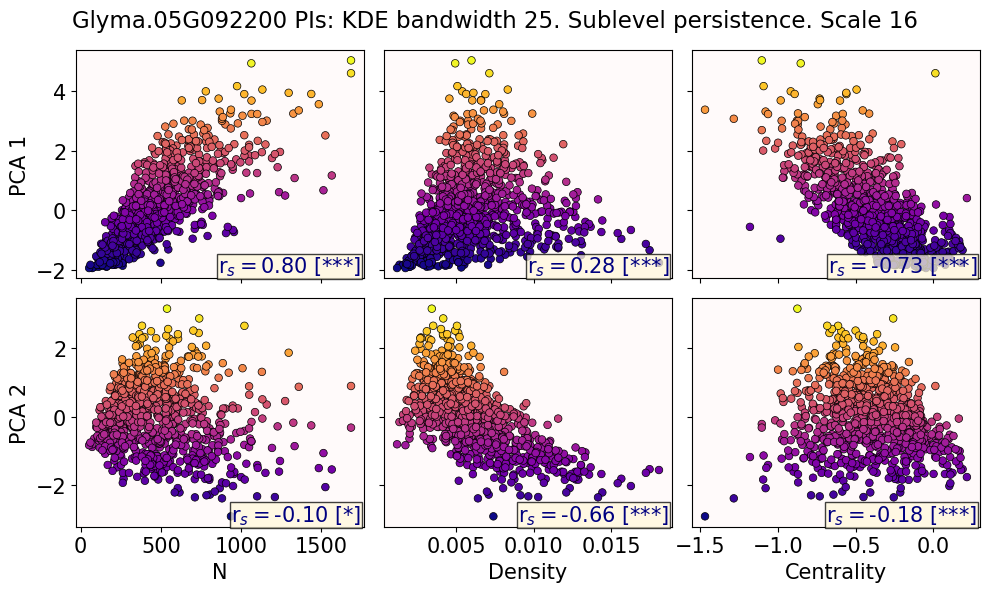

In [23]:
fig, ax = plt.subplots(2, len(smcolumns)-2, figsize=(10,6), sharex=False, sharey=False)

for j in range(ax.shape[1]):
    
    x = df[gene][smcolumns[j+2]]
    ax[0,j].tick_params(bottom=True, labelbottom=False)
    ax[1,j].set_xlabel(smcolumns[j+2], fontsize=fs)
    
    for i in range(ax.shape[0]):

        y = df[gene][smcolumns[i]]
            
        ax[i,j].scatter(x, y, c=y,  marker='o', cmap=Cmap, s=s,
                        edgecolor='k', linewidth=0.5, zorder=3)
        ax[i,j].set_facecolor('snow')
        ax[i,j].tick_params(labelsize=fs)
        
        r,p = corr[gene].loc[smcolumns[i] + '-vs-' + smcolumns[j+2], ['sspearman', 'pspearman'] ]
        ll = 'r$_s = ${:.2f} [{}]'.format(r, utils.star_signif(p, mx=3))
        ax[i,j].text(0.99,0, ll, transform=ax[i,j].transAxes, fontsize=fs, **rtkw)

for i in range(ax.shape[0]):
    ax[i,0].set_ylabel(smcolumns[i], fontsize=fs)
    for j in range(1,ax.shape[1]):
        ax[i,j].tick_params(labelleft=False)
        
fig.suptitle(Bname, fontsize=1.1*fs)
fig.tight_layout()
plt.savefig(bname + 'spatial_corr.png', dpi=dpi, format='png', bbox_inches='tight')

# All together

In [7]:
df = dict(zip(gene_list, [pd.DataFrame() for _ in gene_list]))
corr = dict(zip(gene_list, [pd.DataFrame() for _ in gene_list]))

for gene in gene_list:
    transcell = pd.read_csv(ksrc+sample+'_transcells_metadata'+ dfmeta.loc[gene, 'ex_nuclei'] +'.csv', index_col='gene').rename(columns=int)
    bw, SCALE = dfmeta.loc[gene, ['bw', 'SCALE']].values
    centrality = pd.read_csv(psrc + '{}/{}_bins_bw{}_S{}_peripherality.csv'.format(gene, KBINS_NO-1, bw, SCALE))
    
    bname = isrc + '{}_bw{}_{}level'.format(gene.replace('GLYMA_',''), bw, level) + os.sep + 'PI_scale{}_'.format(SCALE)
    Bname = gene.replace('_','.').title() + ' PIs: {}level persistence.'.format(level.title())
    print(bname, Bname, sep='\n')
    
    embedding = pd.read_csv(bname + 'pca.csv')
    zero_val = embedding.iloc[-1, 2:].values
    zs = [0, 0, zero_val[0], zero_val[1]]
    embedding = embedding.iloc[:-1]
    
    gcells = transcell.loc[gene,Cells][transcell.loc[gene,Cells] > 0].index
    df[gene].index = gcells
    for i in range(2):
        df[gene][smcolumns[i]] = embedding.iloc[:, i+2].values
    i+=1
    df[gene][smcolumns[i]] = transcell.loc[gene, gcells]; i+=1
    df[gene][smcolumns[i]] = transcell.loc[gene, gcells]/metacell.loc[gcells, 'cyto_area']; i+=1
    df[gene][smcolumns[i]] = centrality[gene + '_-_m'].values; i+=1
    
    dfmin = df[gene].min()
    dfmax = df[gene].max()
    for c in dfmin.index:
        dfmeta.loc[gene, c+'_min'] = dfmin[c]
        dfmeta.loc[gene, c+'_max'] = dfmax[c]
    
    corr[gene] = pd.DataFrame(index=vs, columns=crcolumns)
    for idx in corr[gene].index:
        x,y = df[gene].loc[ :, idx.split('-vs-') ].T.values
        corr[gene].loc[idx, ['sspearman', 'pspearman'] ] = stats.spearmanr(x,y)
        corr[gene].loc[idx, ['spearson', 'ppearson'] ] = stats.pearsonr(x,y)
        c = stats.linregress(x,y)
        corr[gene].loc[idx, ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']] = c
        corr[gene].loc[idx, 'intercept_stderr'] = c.intercept_stderr
    
    fig, ax = plt.subplots(2, len(smcolumns)-2, figsize=(10,6), sharex=False, sharey=False)
    
    for j in range(ax.shape[1]):
        
        x = df[gene][smcolumns[j+2]]
        ax[0,j].tick_params(bottom=True, labelbottom=False)
        ax[1,j].set_xlabel(smcolumns[j+2], fontsize=fs)
        
        for i in range(ax.shape[0]):
    
            y = df[gene][smcolumns[i]]
                
            ax[i,j].scatter(x, y, c=y,  marker='o', cmap=Cmap, s=s,
                            edgecolor='k', linewidth=0.5, zorder=3)
            ax[i,j].set_facecolor('snow')
            ax[i,j].tick_params(labelsize=fs)
            
            r,p = corr[gene].loc[smcolumns[i] + '-vs-' + smcolumns[j+2], ['sspearman', 'pspearman'] ]
            ll = 'r$_s = ${:.2f} [{}]'.format(r, utils.star_signif(p, mx=3))
            ax[i,j].text(0.99,0, ll, transform=ax[i,j].transAxes, fontsize=fs, **rtkw)
    
    for i in range(ax.shape[0]):
        ax[i,0].set_ylabel(smcolumns[i], fontsize=fs)
        for j in range(1,ax.shape[1]):
            ax[i,j].tick_params(labelleft=False)
            
    fig.suptitle(Bname, fontsize=1.1*fs)
    fig.tight_layout()
    plt.savefig(bname + 'spatial_corr.png', dpi=dpi, format='png', bbox_inches='tight')
    print(bname + 'spatial_corr.png')
    plt.close()

os.pardir/infected_focus_summer24/D2/05G092200_bw25_sublevel/PI_scale16_
Glyma.05G092200 PIs: Sublevel persistence.
os.pardir/infected_focus_summer24/D2/05G092200_bw25_sublevel/PI_scale16_spatial_corr.png
os.pardir/infected_focus_summer24/D2/05G216000_bw15_sublevel/PI_scale8_
Glyma.05G216000 PIs: Sublevel persistence.
os.pardir/infected_focus_summer24/D2/05G216000_bw15_sublevel/PI_scale8_spatial_corr.png
os.pardir/infected_focus_summer24/D2/12G027400_bw20_sublevel/PI_scale40_
Glyma.12G027400 PIs: Sublevel persistence.
os.pardir/infected_focus_summer24/D2/12G027400_bw20_sublevel/PI_scale40_spatial_corr.png
os.pardir/infected_focus_summer24/D2/15G210100_bw15_sublevel/PI_scale48_
Glyma.15G210100 PIs: Sublevel persistence.
os.pardir/infected_focus_summer24/D2/15G210100_bw15_sublevel/PI_scale48_spatial_corr.png
os.pardir/infected_focus_summer24/D2/17G185800_bw15_sublevel/PI_scale48_
Glyma.17G185800 PIs: Sublevel persistence.
os.pardir/infected_focus_summer24/D2/17G185800_bw15_sublevel/PI_sc

# t-tests

In [3]:
from scipy import ndimage
import tifffile as tf
import json
import string

In [4]:
cells = pd.read_excel(os.pardir + os.sep + 'OneDrive_2025-07-16/Additional file 2.xlsx', sheet_name=None, skiprows=2, keep_default_na=True, header=None)
dkeys = list(cells.keys())
ddkeys = ['Infected\nCells', 'Vascular\nBundle', 'Inner & Outer\nCortex', 'Uninfected\nCells']
dkeys

['Infected Cells',
 'Vascular Bundle',
 'Inner & Outer Cortex',
 'Uninfected Cells',
 'Sclerid Layer']

In [5]:
vol = 'area'
nuclei_mask_cutoff = 1
label, cellnum = ndimage.label(tf.imread(wsrc + sample + '_dams.tif').astype(bool), ndimage.generate_binary_structure(2,1))
print('Detected',cellnum,'cells')
wcoords = np.loadtxt(ksrc + sample + '_icoords.csv', delimiter=',', dtype=int)
wc = wcoords[:, ~np.all(wcoords%100, axis=0)]

lnuc, nnuc = ndimage.label(tf.imread(nsrc + sample + '_EDT.tif') < nuclei_mask_cutoff, ndimage.generate_binary_structure(2,1))
print('Detected',nnuc,'nuclei')

exclude_nuclei = False
if exclude_nuclei:
    filenameb = os.pardir + os.sep + 'translocs' + os.sep + sample + os.sep + 'location_corrected_D2_-_{}.csv'
    ex_nuclei = ''
    pdkw = {'header':None, 'names':['X', 'Y', 'Z']}
else:
    filenameb = os.pardir + os.sep + 'Bacteria Info for Erik' + os.sep + '{}_v2.txt'
    ex_nuclei = '_w_nucleus'
    pdkw = {'sep':'\t'}

print(ksrc + sample + '_transcells_metadata'+ ex_nuclei + '.csv')
transcell = pd.read_csv(ksrc + sample + '_transcells_metadata' + ex_nuclei + '.csv', index_col='gene').rename(columns=int)
transcriptomes = np.asarray(transcell.index, dtype=str)

translocs = dict()
for gene in transcriptomes:
    filename = filenameb.format(gene)
    translocs[gene] = pd.read_csv(filename, **pdkw)
    translocs[gene]['cidx'] = label[ translocs[gene]['Y'], translocs[gene]['X'] ]
    translocs[gene]['nidx'] =  lnuc[ translocs[gene]['Y'], translocs[gene]['X'] ]
tlocs = pd.concat(translocs)

volkeys = ['area', 'volume']

Detected 2937 cells
Detected 1365 nuclei
os.pardir/kde/D2/D2_transcells_metadata_w_nucleus.csv


In [8]:
if True:
    for didx in range(len(dkeys)-1):
            
        cdf = cells[dkeys[didx]].dropna(axis=0, how='any', subset=[cells[dkeys[didx]].shape[1]-1]).astype(int)
        cidx = np.zeros(len(cdf), dtype=int)
        for i in range(len(cidx)):
            cidx[i] = metacell[metacell['orig_cellID'] == cdf.iloc[i,0]].index[0]
        dcell = metacell.loc[cidx][metacell.loc[cidx]['number_nuclei'] == 1].index.values
        
        print(dkeys[didx], len(dcell), sep='\t')
    
        density = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
        for key in density:
            for gene in transcriptomes[10:]:
                density[key][gene] = pd.DataFrame(0, index=np.intersect1d( dcell, transcell.loc[gene, transcell.loc[gene] > 1].index), 
                                                  columns=['Ncyto', 'Nnuclei', 'cyto', 'nuclei'], 
                                                  dtype=float).astype({'Ncyto':int, 'Nnuclei':int})
                
        for gene in density[volkeys[0]]:
            for cidx in density[volkeys[0]][gene].index:
                coords = translocs[gene][ translocs[gene]['cidx'] == cidx ]
                for key in volkeys:
                    for c in ['cyto', 'nuclei']:
                        density[key][gene].loc[cidx,'N'+c] = len(coords[coords['L'] == c[0]])
                        density[key][gene].loc[cidx, c] = len(coords[coords['L'] == c[0]])/metacell.loc[cidx, c + '_' + key]
        
        for key in density:
            for gene in density[key]:
                density[key][gene] = density[key][gene][(density[key][gene]['Ncyto'] > 0) & (density[key][gene]['Nnuclei'] > 0)]
                density[key][gene] = density[key][gene].astype({'Ncyto':int,'Nnuclei':int})
                density[key][gene]['ratio'] = np.log10((density[key][gene]['nuclei']/density[key][gene]['cyto']).values)
        
            ctrans = pd.Series(map(len, density[key].values()), index=density[key].keys())
            ctrans = ctrans[ctrans >= max([5,0.1*len(dcell)])]
        
            filename = ksrc + sample + '_'+key+'_ratios_'+dkeys[didx].replace(' ','_')+'.json'
            print(filename)
            dd = dict(zip(ctrans.index, [density[key][gene]['ratio'].values.tolist() for gene in ctrans.index]))
            with open(filename, 'w') as f:
                json.dump(dd,f,indent=1, separators=(',', ':'))

ratios = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in ratios:
    ratios[key] = dict(zip(dkeys[:-1], [dict() for _ in range(len(dkeys) - 1)]))
    for dkey in dkeys[:-1]:
        filename = ksrc + sample + '_'+key+'_ratios_'+dkey.replace(' ','_')+'.json'
        with open(filename) as f:
            ratios[key][dkey] = json.load(f)

ctrans = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in ratios:
    ctrans[key] = dict(zip(dkeys[:-1], [dict() for _ in range(len(dkeys) - 1)]))
    for dkey in ratios[key]:
        dd = ratios[key][dkey]
        ctrans[key][dkey]= pd.Series(map(len, dd.values()), index=dd.keys())

Infected Cells	332
os.pardir/kde/D2/D2_area_ratios_Infected_Cells.json
os.pardir/kde/D2/D2_volume_ratios_Infected_Cells.json
Vascular Bundle	47
os.pardir/kde/D2/D2_area_ratios_Vascular_Bundle.json
os.pardir/kde/D2/D2_volume_ratios_Vascular_Bundle.json
Inner & Outer Cortex	70
os.pardir/kde/D2/D2_area_ratios_Inner_&_Outer_Cortex.json
os.pardir/kde/D2/D2_volume_ratios_Inner_&_Outer_Cortex.json
Uninfected Cells	18
os.pardir/kde/D2/D2_area_ratios_Uninfected_Cells.json
os.pardir/kde/D2/D2_volume_ratios_Uninfected_Cells.json
os.pardir/kde/D2/D2_area_ratios_Infected_Cells.json
os.pardir/kde/D2/D2_area_ratios_Vascular_Bundle.json
os.pardir/kde/D2/D2_area_ratios_Inner_&_Outer_Cortex.json
os.pardir/kde/D2/D2_area_ratios_Uninfected_Cells.json
os.pardir/kde/D2/D2_volume_ratios_Infected_Cells.json
os.pardir/kde/D2/D2_volume_ratios_Vascular_Bundle.json
os.pardir/kde/D2/D2_volume_ratios_Inner_&_Outer_Cortex.json
os.pardir/kde/D2/D2_volume_ratios_Uninfected_Cells.json


In [9]:
key = 'volume'
trans = set()
for dkey in ctrans[key]:
    trans |= set(ctrans[key][dkey].index)
trans = sorted(list(trans))
trans = dict(zip(trans, [ [i, 'w', 'w'] for i in range(len(trans)) ]))

trans['GLYMA_17G195900'][1] = 'r'
trans['GLYMA_15G210100'][1] = 'yellow'
trans['GLYMA_11G078300'][1] = 'r'
trans['GLYMA_15G245800'][1] = 'lime'
trans['GLYMA_20G061300'][1] = 'yellow'
trans['GLYMA_06G002000'][1] = 'yellow'
trans['GLYMA_05G092200'][1] = 'lime'
trans['GLYMA_06G090100'][1] = 'r'
trans['GLYMA_06G256000'][1] = 'yellow'
trans['GLYMA_12G027400'][1] = 'lime'
trans['GLYMA_16G039800'][1] = 'red'

trans['GLYMA_05G092200'][2] = 'lime'
trans['GLYMA_12G027400'][2] = 'yellow'
trans['GLYMA_16G039800'][2] = 'cyan'

ptrans = [ t.title().replace('_','.') for t in trans.keys() ]
ptrans[0] = ptrans[0].upper()

In [10]:
pvals = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in pvals:
    pvals[key] = dict(zip(dkeys[:-1], [dict() for _ in range(len(dkeys) - 1)]))
    for dkey in pvals[key]:
        pvals[key][dkey] = pd.DataFrame(2., index=ctrans[key][dkey].index, columns=ctrans[key][dkey].index)
        for i in range(len(ctrans[key][dkey])-1):
            gi = ctrans[key][dkey].index[i]
            for j in range(i+1, len(ctrans[key][dkey])):
                gj = ctrans[key][dkey].index[j]
                pvals[key][dkey].iloc[i,j] = stats.ttest_ind(ratios[key][dkey][gi], ratios[key][dkey][gj], equal_var=False).pvalue

bhpvals = utils.pval_corrections(pvals, 'bh')
bypvals = utils.pval_corrections(pvals, 'by')

signif = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in pvals:
    signif[key] = dict(zip(dkeys[:-1], [dict() for _ in range(len(dkeys) - 1)]))
    for dkey in pvals[key]:
        signif[key][dkey] = dict(zip(pvals[key][dkey].index, [ ['',''] for _ in range(len(pvals[key][dkey])) ]))

['Infected Cells', 'Inner & Outer Cortex', 'Vascular Bundle', 'Uninfected Cells', 'S']


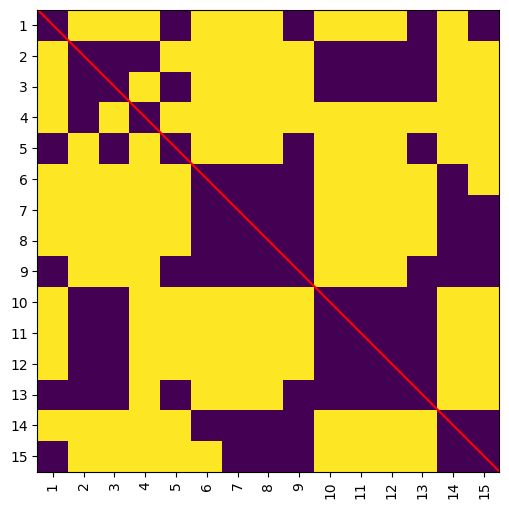

In [188]:
print(dkeys)
dkey = dkeys[1]

fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0
dd = bhpvals[key][dkey] < 0.05
ax[i].imshow(dd.values)
ax[i].axline((0,0), slope=1, c='r')
ax[i].set_yticks(range(len(dd)), dd.index);
ax[i].set_xticks(range(len(dd)), dd.index, rotation=90);

ax[i].set_yticks(range(len(dd)), np.arange(len(dd))+1);
ax[i].set_xticks(range(len(dd)), np.arange(len(dd))+1);

In [11]:
dkey = 'Infected Cells'
s = ['a','b','c','b','d','b']
t = ['a','','a','ac','', 'a']
print(len(s), len(t))
for i,gene in enumerate(signif[key][dkey]):
    signif[key][dkey][gene][0] = s[i]
    signif[key][dkey][gene][1] = t[i]

dkey = 'Uninfected Cells'
s = ['a', 'b', 'c', 'c', 'ac']
t = ['c', '', 'bc', 'b', 'b']
print(len(s), len(t))
for i,gene in enumerate(signif[key][dkey]):
    signif[key][dkey][gene][0] = s[i]
    signif[key][dkey][gene][1] = t[i]

dkey = 'Vascular Bundle'
s = ['a','ab','a','b','ad','c','ac','ab','a','ab','a','ab','a','a','c','a','ab','a','cd']
t = ['', 'a', 'a', 'bc', 'a', 'a', '', 'b', 'a', '', 'a', '', '', 'ab', '', '', 'a', '', 'a']
print(len(s), len(t))
for i,gene in enumerate(signif[key][dkey]):
    signif[key][dkey][gene][0] = s[i]
    signif[key][dkey][gene][1] = t[i]

dkey = 'Inner & Outer Cortex'
s = ['acf','be','ace','b','c','d','adf','adf','cdef','e','e','e','acef','adf','f']
t = ['', 'a', 'a','b','a','a','','','','a','b','a','a','','a']
print(len(s), len(t))
for i,gene in enumerate(signif[key][dkey]):
    signif[key][dkey][gene][0] = s[i]
    signif[key][dkey][gene][1] = t[i]

6 6
5 5
19 19
15 15


In [12]:
yaxis = np.linspace(-3, 3, 125)
kde = dict()
for dkey in dkeys[:-1]:
    kde[dkey] = dict()
    for gene in ratios[key][dkey]:
        kernel = stats.gaussian_kde(ratios[key][dkey][gene], bw_method=0.35)
        y = kernel(yaxis)
        y = 0.45*y/y.max()
        ymask = y < 1e-4
        kde[dkey][gene] = np.vstack([y[~ymask],yaxis[~ymask]])

In [204]:
dkeys = ['Infected Cells', 'Inner & Outer Cortex',  'Vascular Bundle', 'Uninfected Cells', 'S']
ddkeys = ['Infected\nCells', 'Inner & Outer\nCortex',  'Vascular\nBundle', 'Uninfected\nCells', 'S']

os.pardir/OneDrive_2025-07-16/NewSuppFigure3.pdf


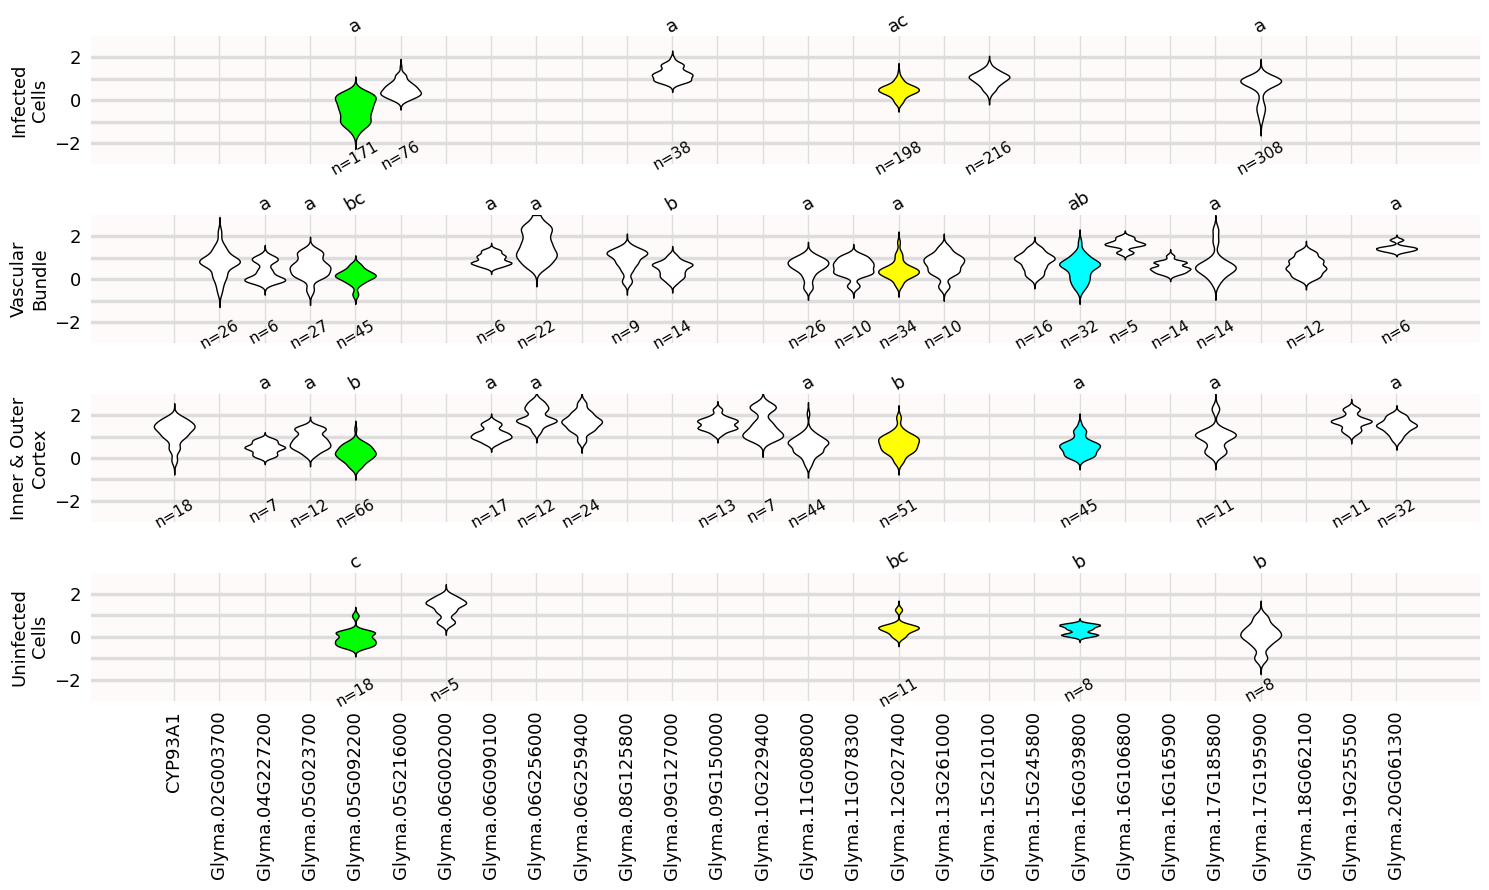

In [13]:
k = 2
rtkw = dict()
fs = 13
fig, ax = plt.subplots(4, 1, figsize=(15, 9), sharey=True, sharex=True)
ax = np.atleast_1d(ax).ravel(); i = 0

for i in range(len(ax)):
    ax[i].spines[['left','bottom', 'right', 'top']].set_visible(False)
    ax[i].set_ylabel(ddkeys[i], fontsize=fs)
    ax[i].set_facecolor('snow')
    ax[i].set_ylim(yaxis[0], yaxis[-1]);
    for x in range(len(trans)):
        ax[i].axvline(x, c='#dddddd', lw=1, zorder=1)
    for y in np.linspace(-2,2, 5):
        ax[i].axhline(y, c='#dddddd', lw=2.5, zorder=1)

    ax[i].set_xticks(range(len(ptrans)), ptrans, rotation=90)
    ax[i].tick_params(labelsize=fs, bottom=False, left=False)

for i,dkey in enumerate(dkeys[:-1]):
    for gene in kde[dkey]:
        j = trans[gene][0]
        N = ctrans[key][dkey][gene]
        ax[i].fill_betweenx(kde[dkey][gene][1], kde[dkey][gene][0]+j, j-kde[dkey][gene][0], fc=trans[gene][k], ec='k')
        ax[i].text(j,yaxis[25], 'n={}'.format(N), fontsize=0.85*fs, ha='center', va='top', c='k', rotation=30)
        ax[i].text(j,yaxis[-1], signif[key][dkey][gene][k-1], fontsize=fs, ha='center', va='bottom', c='k', rotation=30)

fig.tight_layout();

dst = os.pardir + os.sep + 'OneDrive_2025-07-16' + os.sep
filename = dst + 'NewSuppFigure3.pdf'
print(filename)
plt.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')

In [156]:
key = 'volume'
tcount = pd.Series(0, dtype=int, index=trans.keys())
for dkey in ctrans[key]:
    for gene in ctrans[key][dkey].index:
        tcount.loc[gene] += 1
tcount = tcount[tcount > 1]

pvals_tiss = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in pvals:
    pvals_tiss[key] = dict(zip(tcount.index, [dict() for _ in range(len(tcount))]))
    for gene in tcount.index:
        pvals_tiss[key][gene] = pd.DataFrame(2., index=dkeys[:-1], columns=dkeys[:-1])
        for i in range(len(dkeys[:-1])-1):
            ti = dkeys[i]
            for j in range(i+1, len(dkeys[:-1])):
                tj = dkeys[j]
                if (gene in ratios[key][ti]) and (gene in ratios[key][tj]):
                    p = stats.ttest_ind(ratios[key][ti][gene], ratios[key][tj][gene], equal_var=False).pvalue
                    pvals_tiss[key][gene].iloc[i,j] = p
                    pvals_tiss[key][gene].iloc[j,i] = p
        
        pmask = (pvals_tiss[key][gene] < 2).any(axis=0) + (pvals_tiss[key][gene] < 2).any(axis=1)
        pvals_tiss[key][gene] = pvals_tiss[key][gene].loc[ pmask , pmask ]

#bhpvals_tiss = utils.pval_corrections(pvals_tiss, 'bh')
#bypvals_tiss = utils.pval_corrections(pvals_tiss, 'by')

gene = 'GLYMA_20G061300'
bhpvals_tiss[key][gene]

,Inner & Outer Cortex,Vascular Bundle
Inner & Outer Cortex,2.000000,0.814225
Vascular Bundle,0.814225,2.000000


In [118]:
tcount

GLYMA_04G227200    2
GLYMA_05G023700    2
GLYMA_05G092200    4
GLYMA_06G090100    2
GLYMA_06G256000    2
GLYMA_09G127000    2
GLYMA_11G008000    2
GLYMA_12G027400    4
GLYMA_16G039800    3
GLYMA_17G185800    2
GLYMA_17G195900    2
GLYMA_20G061300    2
dtype: int64

In [198]:
gene = tcount.index[10]
print(gene)
pvals_tiss[key][gene]

GLYMA_17G195900


,Infected Cells,Uninfected Cells
Infected Cells,2.000000,0.037412
Uninfected Cells,0.037412,2.000000


In [493]:
tsignif = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
for key in pvals:
    signif[key] = dict(zip(tcount.index, [dict() for _ in range(len(tcount))]))
    for dkey in pvals[key]:
        tsignif[key][dkey] = dict(zip(pvals[key][dkey].index, [ '' for _ in range(len(pvals[key][dkey])) ]))

,CYP93A1,GLYMA_04G227200,GLYMA_05G023700,GLYMA_05G092200,GLYMA_06G090100,GLYMA_06G256000,GLYMA_06G259400,GLYMA_09G150000,GLYMA_10G229400,GLYMA_11G008000,GLYMA_12G027400,GLYMA_16G039800,GLYMA_17G185800,GLYMA_19G255500,GLYMA_20G061300
CYP93A1,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_04G227200,2.018363e-03,2.000000e+00,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_05G023700,3.871486e-02,6.464490e-02,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_05G092200,6.691176e-14,9.722241e-02,0.000004,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_06G090100,5.845990e-01,7.401215e-05,0.027340,3.513026e-14,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_06G256000,4.350617e-04,3.005079e-07,0.000001,2.708091e-23,0.000002,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_06G259400,3.989247e-03,2.560284e-07,0.000003,1.119585e-26,0.000107,9.419193e-02,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_09G150000,2.331291e-02,2.020758e-07,0.000015,3.525011e-20,0.000262,3.196363e-02,6.264945e-01,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_10G229400,2.130451e-01,1.411141e-03,0.007679,7.620928e-12,0.045131,1.006413e-01,4.924627e-01,7.098597e-01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0
GLYMA_11G008000,2.309084e-05,4.855790e-01,0.134492,9.232673e-06,0.000042,1.353322e-12,1.058403e-13,6.868484e-10,0.000017,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.0


In [193]:
key = 'volume'
filename = 'pvalues_bh_correction.xlsx'
with pd.ExcelWriter(filename) as writer:
    for dkey in bhpvals[key]:
        bhpvals[key][dkey].to_excel(writer, sheet_name=dkey, index=True, index_label='Gene')

filename = 'pvalues_by_correction.xlsx'
with pd.ExcelWriter(filename) as writer:
    for dkey in bypvals[key]:
        bypvals[key][dkey].to_excel(writer, sheet_name=dkey, index=True, index_label='Gene')

In [210]:
pvals_tiss[key][gene]

,Infected Cells,Uninfected Cells
Infected Cells,2.000000,0.037412
Uninfected Cells,0.037412,2.000000


In [211]:
key = 'volume'
filename = 'intertissue_pvalues.xlsx'
with pd.ExcelWriter(filename) as writer:
    for gene in pvals_tiss[key]:
        pvals_tiss[key][gene].to_excel(writer, sheet_name=gene, index=True, index_label='Cell Type')


### Putting it all together

In [106]:
for didx in range(len(dkeys)-1):
    
    cdf = cells[dkeys[didx]].dropna(axis=0, how='any', subset=[cells[dkeys[didx]].shape[1]-1]).astype(int)
    cidx = np.zeros(len(cdf), dtype=int)
    for i in range(len(cidx)):
        cidx[i] = metacell[metacell['orig_cellID'] == cdf.iloc[i,0]].index[0]
    dcell = metacell.loc[cidx][metacell.loc[cidx]['number_nuclei'] == 1].index.values
    
    print(dkeys[didx], len(dcell), sep='\t')

    density = dict(zip(volkeys, [dict() for _ in range(len(volkeys))]))
    for key in density:
        for gene in transcriptomes[10:]:
            density[key][gene] = pd.DataFrame(0, index=np.intersect1d( dcell, transcell.loc[gene, transcell.loc[gene] > 1].index), 
                                              columns=['Ncyto', 'Nnuclei', 'cyto', 'nuclei'], 
                                              dtype=float).astype({'Ncyto':int, 'Nnuclei':int})
            
    for gene in density[volkeys[0]]:
        for cidx in density[volkeys[0]][gene].index:
            coords = translocs[gene][ translocs[gene]['cidx'] == cidx ]
            for key in volkeys:
                for c in ['cyto', 'nuclei']:
                    density[key][gene].loc[cidx,'N'+c] = len(coords[coords['L'] == c[0]])
                    density[key][gene].loc[cidx, c] = len(coords[coords['L'] == c[0]])/metacell.loc[cidx, c + '_' + key]
    
    for key in density:
        for gene in density[key]:
            density[key][gene] = density[key][gene][(density[key][gene]['Ncyto'] > 0) & (density[key][gene]['Nnuclei'] > 0)]
            density[key][gene] = density[key][gene].astype({'Ncyto':int,'Nnuclei':int})
            density[key][gene]['ratio'] = np.log10((density[key][gene]['nuclei']/density[key][gene]['cyto']).values)
    
    ctrans = pd.Series(map(len, density[key].values()), index=density[key].keys())
    ctrans = ctrans[ctrans >= max([5,0.05*len(dcell)])]

    for key in density:
        filename = ksrc + sample + '_'+key+'_ratios_'+dkeys[didx].replace(' ','_')+'.json'
        print(filename)
        dd = dict(zip(ctrans.index, [density[key][gene]['ratio'].values.tolist() for gene in ctrans.index]))
        with open(filename, 'w') as f:
            json.dump(dd,f,indent=1, separators=(',', ':'))

Infected Cells (from PCA)	332
os.pardir/kde/D2/D2_area_ratios_Infected_Cells_(from_PCA).json
os.pardir/kde/D2/D2_volume_ratios_Infected_Cells_(from_PCA).json
Uninfected Cells (co-express)	18
os.pardir/kde/D2/D2_area_ratios_Uninfected_Cells_(co-express).json
os.pardir/kde/D2/D2_volume_ratios_Uninfected_Cells_(co-express).json
Vascular Bundle Co-expression	47
os.pardir/kde/D2/D2_area_ratios_Vascular_Bundle_Co-expression.json
os.pardir/kde/D2/D2_volume_ratios_Vascular_Bundle_Co-expression.json
InnerOuter Cortex (co-express)	70
os.pardir/kde/D2/D2_area_ratios_InnerOuter_Cortex_(co-express).json
os.pardir/kde/D2/D2_volume_ratios_InnerOuter_Cortex_(co-express).json


# t-test of nuclear-vs-cytoplasmic density within same cell

In [110]:
ttest = dict(zip(volkeys, [pd.DataFrame(1., index=density[key].keys(), 
                                        columns=['stat', 'pvalue', 'df', 'bh', 'by']) for _ in range(len(volkeys))]))
for key in ttest:
    for gene in ttest[key].index:
        t_test = stats.ttest_rel(*density[key][gene].T.values)
        ttest[key].loc[gene] = [t_test.statistic, t_test.pvalue, t_test.df,1,1]
    ttest[key] = ttest[key].loc[~pd.isna(ttest[key]['pvalue'])]
    for method in ['bh','by']:
        ttest[key][method] = stats.false_discovery_control(ttest[key]['pvalue'].values, method=method)

ttest[key][ttest[key]['bh'] < 0.01]

TtestResult(statistic=-20.039637186598085, pvalue=4.661200023869701e-59, df=331)